### Article 1 Code: Data acquiry, processing, and statistical analyses

Extract a list of targeted sources

In [1]:
import requests
import random
from selenium import webdriver #selenium tools to automate web browsing
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import TimeoutException
import time
import bs4
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import undetected_chromedriver as uc

In [2]:
EUC_url = 'https://www.consilium.europa.eu/en/press/press-releases/?keyword=&DateFrom=2022%2F02%2F01&DateTo=2025%2F02%2F28&Topic=122265'

all_EUC_urls = []
wait_time = random.uniform(2, 5)

options = uc.ChromeOptions()
options.add_argument("start-maximized")
# Uncomment if you want headless, but be careful with detection:
# options.headless = True

driver = uc.Chrome(options=options)
driver.get(EUC_url)
time.sleep(wait_time)
wait = WebDriverWait(driver, 10)

try:
    reject_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, "reject_cookies"))
    )
    reject_button.find_element(By.XPATH, "./ancestor::button").click()
    print("Cookie settings handled.")
except Exception as e:
    print(f"Cookie rejection button not found or failed to click: {e}")

try:
    for _ in range(30):
        try:
            no_thanks_button = WebDriverWait(driver, 0.2).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, 'button[data-action="reject"][type="button"].gsc-btn.gsc-btn--secondary'))
            )
            print("No thanks button appeared, waiting 15 seconds before clicking...")
            time.sleep(15)
            no_thanks_button.click()
            print("No thanks button clicked.")
            break
        except:
            continue
except Exception as e:
    print(f"Error while handling 'No thanks' button: {e}")

for page in range(23):
    complete_EUC_content = driver.page_source
    parsed_EUC_content = BeautifulSoup(complete_EUC_content, 'html.parser')

    a_elements = parsed_EUC_content.find_all('a', class_='gsc-excerpt-item__title gsc-heading--xsm')

    for a_element in a_elements:
        if a_element and a_element.has_attr('href'):
            full_url = urljoin(EUC_url, a_element['href'])
            all_EUC_urls.append(full_url)

    time.sleep(wait_time)

    try:
        next_page = driver.find_element(By.XPATH, '//a[@title="Go to the next page"]')
        next_page.click()
    except NoSuchElementException:
        print("Next page button not found. Ending pagination.")
        break

driver.quit()

for url in all_EUC_urls:
    print(url)


Cookie settings handled.
Next page button not found. Ending pagination.
https://www.consilium.europa.eu/en/press/press-releases/2022/02/23/russian-recognition-of-the-non-government-controlled-areas-of-the-donetsk-and-luhansk-oblasts-of-ukraine-as-independent-entities-eu-adopts-package-of-sanctions/
https://www.consilium.europa.eu/en/press/press-releases/2022/02/24/european-council-conclusions-24-february-2022/
https://www.consilium.europa.eu/en/press/press-releases/2022/02/24/g7-leaders-statement-on-the-invasion-of-ukraine-by-armed-forces-of-the-russian-federation/
https://www.consilium.europa.eu/en/press/press-releases/2022/02/24/remarks-by-president-michel-at-the-joint-press-conference-with-commission-president-von-der-leyen-and-nato-secretary-general-stoltenberg/
https://www.consilium.europa.eu/en/press/press-releases/2022/02/24/joint-statement-by-the-members-of-the-european-council/
https://www.consilium.europa.eu/en/press/press-releases/2022/02/24/ukraine-declaration-by-the-high-r

In [3]:
print(all_EUC_urls)
print(len(all_EUC_urls))

['https://www.consilium.europa.eu/en/press/press-releases/2022/02/23/russian-recognition-of-the-non-government-controlled-areas-of-the-donetsk-and-luhansk-oblasts-of-ukraine-as-independent-entities-eu-adopts-package-of-sanctions/', 'https://www.consilium.europa.eu/en/press/press-releases/2022/02/24/european-council-conclusions-24-february-2022/', 'https://www.consilium.europa.eu/en/press/press-releases/2022/02/24/g7-leaders-statement-on-the-invasion-of-ukraine-by-armed-forces-of-the-russian-federation/', 'https://www.consilium.europa.eu/en/press/press-releases/2022/02/24/remarks-by-president-michel-at-the-joint-press-conference-with-commission-president-von-der-leyen-and-nato-secretary-general-stoltenberg/', 'https://www.consilium.europa.eu/en/press/press-releases/2022/02/24/joint-statement-by-the-members-of-the-european-council/', 'https://www.consilium.europa.eu/en/press/press-releases/2022/02/24/ukraine-declaration-by-the-high-representative-on-behalf-of-the-european-union-on-the-in

In [4]:
print(all_EUC_urls)
with open("urls.txt", "w") as f:
    for url in all_EUC_urls:
        f.write(url + "\n")

# Later, reload URLs
with open("urls.txt", "r") as f:
    all_EUC_urls = [line.strip() for line in f if line.strip()]

import os
print("Saving urls.txt in:", os.getcwd())


['https://www.consilium.europa.eu/en/press/press-releases/2022/02/23/russian-recognition-of-the-non-government-controlled-areas-of-the-donetsk-and-luhansk-oblasts-of-ukraine-as-independent-entities-eu-adopts-package-of-sanctions/', 'https://www.consilium.europa.eu/en/press/press-releases/2022/02/24/european-council-conclusions-24-february-2022/', 'https://www.consilium.europa.eu/en/press/press-releases/2022/02/24/g7-leaders-statement-on-the-invasion-of-ukraine-by-armed-forces-of-the-russian-federation/', 'https://www.consilium.europa.eu/en/press/press-releases/2022/02/24/remarks-by-president-michel-at-the-joint-press-conference-with-commission-president-von-der-leyen-and-nato-secretary-general-stoltenberg/', 'https://www.consilium.europa.eu/en/press/press-releases/2022/02/24/joint-statement-by-the-members-of-the-european-council/', 'https://www.consilium.europa.eu/en/press/press-releases/2022/02/24/ukraine-declaration-by-the-high-representative-on-behalf-of-the-european-union-on-the-in

Convert targeted sources into .txt files

In [5]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import random

# Load URLs from file
with open("urls.txt", "r") as f:
    all_EUC_urls = [line.strip() for line in f if line.strip()]

wait_time_range = (2, 5)  # seconds

options = uc.ChromeOptions()
options.add_argument("start-maximized")
# options.headless = True  # Uncomment if you want headless

driver = uc.Chrome(options=options)
wait = WebDriverWait(driver, 10)

# Open first page to handle cookies/popups
driver.get(all_EUC_urls[0])

# Handle cookies or popups once
try:
    reject_button = wait.until(EC.element_to_be_clickable((By.ID, "reject_cookies")))
    reject_button.find_element(By.XPATH, "./ancestor::button").click()
    print("Cookie settings handled.")
except Exception as e:
    print(f"Cookie rejection button not found or failed to click: {e}")

# Now loop over all URLs
for i, url in enumerate(all_EUC_urls, start=1):
    driver.get(url)
    time.sleep(random.uniform(*wait_time_range))  # polite pause

    try:
        main_section = driver.find_element(By.CSS_SELECTOR, 'section.gsc-main-section.gsc-container')

        # Date is last <li> in the eyebrow list
        date_li_elements = main_section.find_elements(By.CSS_SELECTOR, 'ul.gsc-eyebrow__list li.gsc-eyebrow__item')
        date_text = date_li_elements[-1].text if date_li_elements else "No date found"

        # Title
        url_title = main_section.find_element(By.TAG_NAME, 'h1').text

        # Main text
        main_text_elem = driver.find_element(By.CSS_SELECTOR, 'div.gsc-bge-grid__area')
        main_text = main_text_elem.text

        # Combine text
        full_text = f"{date_text} - {url_title}\n\n{main_text}"

        # Save to file
        file_path = fr'C:\Users\au756931\OneDrive - Aarhus universitet\6. PhD Project\5. Code\Data Scrapping\Consilium Text Files\document_{i}.txt'
        with open(file_path, "w", encoding="utf-8") as f:
            f.write(full_text)

        print(f"Saved file {i} with title: {url_title}")

    except Exception as e:
        print(f"Error processing {url}: {e}")

driver.quit()


Cookie settings handled.
Saved file 1 with title: EU adopts package of sanctions in response to Russian recognition of the non-government controlled areas of the Donetsk and Luhansk oblasts of Ukraine and sending of troops into the region
Saved file 2 with title: European Council conclusions, 24 February 2022
Saved file 3 with title: G7 Leaders’ Statement on the invasion of Ukraine by armed forces of the Russian Federation
Saved file 4 with title: Remarks by President Michel at the joint press conference with Commission President von der Leyen and NATO Secretary-General Stoltenberg
Saved file 5 with title: Joint statement by the members of the European Council
Saved file 6 with title: Ukraine: Declaration by the High Representative on behalf of the European Union on the invasion of Ukraine by armed forces of the Russian Federation
Saved file 7 with title: Press statement of President Charles Michel of the European Council and President Ursula von der Leyen of the European Commission on

Sorting of Txt Files 

In [17]:
#Sorting with the correct labelling into new folder
import os
import shutil
from datetime import datetime

# Original folder path
folder_path = r"C:\Users\au756931\OneDrive - Aarhus universitet\6. PhD Project\5. Code\Data Scrapping\Consilium Text Files"

# New folder path
output_folder = r"C:\Users\au756931\OneDrive - Aarhus universitet\6. PhD Project\5. Code\Data Scrapping\Consilium Text Files RENAMED"

# Function to extract datetime
def extract_datetime_from_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        first_line = f.readline().strip()
    date_str = first_line.split(' - ')[0]
    return datetime.strptime(date_str, '%d %B %Y %H:%M')

# Get all .txt files
filenames = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

# Pair each filename with its datetime
files_with_dates = []
for filename in filenames:
    full_path = os.path.join(folder_path, filename)
    dt = extract_datetime_from_file(full_path)
    files_with_dates.append((filename, dt))

# Sort files by datetime
files_with_dates.sort(key=lambda x: x[1])

# Copy and rename them in order
for idx, (old_name, _) in enumerate(files_with_dates, start=1):
    old_path = os.path.join(folder_path, old_name)
    new_name = f"statement_{idx}.txt"
    new_path = os.path.join(output_folder, new_name)
    shutil.copy2(old_path, new_path)  # copy2 preserves file metadata (e.g. creation date)
    print(f"Copied {old_name} -> {new_name}")

print("Files successfully copied and renamed in chronological order.")
print(f"Total files copied: {len(files_with_dates)}")

Copied document_1.txt -> statement_1.txt
Copied document_7.txt -> statement_2.txt
Copied document_6.txt -> statement_3.txt
Copied document_5.txt -> statement_4.txt
Copied document_4.txt -> statement_5.txt
Copied document_3.txt -> statement_6.txt
Copied document_2.txt -> statement_7.txt
Copied document_8.txt -> statement_8.txt
Copied document_9.txt -> statement_9.txt
Copied document_10.txt -> statement_10.txt
Copied document_11.txt -> statement_11.txt
Copied document_13.txt -> statement_12.txt
Copied document_12.txt -> statement_13.txt
Copied document_14.txt -> statement_14.txt
Copied document_15.txt -> statement_15.txt
Copied document_18.txt -> statement_16.txt
Copied document_17.txt -> statement_17.txt
Copied document_16.txt -> statement_18.txt
Copied document_19.txt -> statement_19.txt
Copied document_20.txt -> statement_20.txt
Copied document_21.txt -> statement_21.txt
Copied document_22.txt -> statement_22.txt
Copied document_23.txt -> statement_23.txt
Copied document_26.txt -> sta

In [28]:
#Extracting date time 
import os
from datetime import datetime

folder_path = r"C:\Users\au756931\OneDrive - Aarhus universitet\3. PhD Project\4. Code\Article 1\Data Scrapping\Consilium Text Files RENAMED"

def extract_datetime_from_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        first_line = f.readline().strip()
    date_str = first_line.split(' - ')[0]  # e.g. "23 February 2022 16:35"
    dt = datetime.strptime(date_str, '%d %B %Y %H:%M')
    return dt

# Sort filenames numerically based on statement number
filenames = sorted(
    [f for f in os.listdir(folder_path) if f.startswith("statement_") and f.endswith(".txt")],
    key=lambda x: int(x.split("_")[1].split(".")[0])
)

# Extract date-times in the same order
date_time_list = []
for filename in filenames:
    full_path = os.path.join(folder_path, filename)
    dt = extract_datetime_from_file(full_path)
    date_time_list.append(dt)

# Now date_time_list is ordered and you can plot with it
print(date_time_list)
print(len(date_time_list))


[datetime.datetime(2022, 2, 23, 16, 35), datetime.datetime(2022, 2, 24, 7, 0), datetime.datetime(2022, 2, 24, 10, 10), datetime.datetime(2022, 2, 24, 12, 0), datetime.datetime(2022, 2, 24, 15, 40), datetime.datetime(2022, 2, 24, 18, 10), datetime.datetime(2022, 2, 24, 21, 10), datetime.datetime(2022, 2, 25, 4, 0), datetime.datetime(2022, 2, 27, 20, 45), datetime.datetime(2022, 2, 28, 17, 40), datetime.datetime(2022, 3, 1, 14, 40), datetime.datetime(2022, 3, 2, 12, 35), datetime.datetime(2022, 3, 2, 17, 10), datetime.datetime(2022, 3, 4, 16, 10), datetime.datetime(2022, 3, 9, 13, 50), datetime.datetime(2022, 3, 11, 3, 0), datetime.datetime(2022, 3, 11, 15, 50), datetime.datetime(2022, 3, 11, 17, 10), datetime.datetime(2022, 3, 12, 10, 0), datetime.datetime(2022, 3, 15, 8, 45), datetime.datetime(2022, 3, 15, 17, 50), datetime.datetime(2022, 3, 16, 19, 15), datetime.datetime(2022, 3, 17, 17, 35), datetime.datetime(2022, 3, 23, 18, 20), datetime.datetime(2022, 3, 23, 18, 30), datetime.date

In [ ]:
#Fixing date times with identical timestamps

date_time_list[97] = date_time_list[97].replace(second=1)
date_time_list[98] = date_time_list[98].replace(second=2)
date_time_list[99] = date_time_list[99].replace(second=3)
date_time_list[143] = date_time_list[143].replace(second=1)
date_time_list[192] = date_time_list[192].replace(second=1)
date_time_list[351] = date_time_list[351].replace(second=1)
date_time_list[425] = date_time_list[425].replace(second=1)
date_time_list[441] = date_time_list[441].replace(second=1)

EmoRoBERTa Model Performance

In [3]:
import transformers
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline
from transformers import pipeline
import tqdm as notebook_tqdm
import json
import pandas as pd
import os
from dateutil import parser
from datetime import datetime

C:\Users\au756931\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
emotion = pipeline('sentiment-analysis', 
                    model='arpanghoshal/EmoRoBERTa', 
                    return_all_scores= True,
                    token="[...]")

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
Device set to use 0
C:\Users\au756931\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\pipelines\text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [5]:
#EmoRoBERTa Sentiment Analysis 
import os
import pandas as pd
from datetime import datetime

# Reuse read_txt_file and chunking functions
def read_txt_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # Only return text after the first double line break
    parts = content.split('\n\n', 1)
    if len(parts) > 1:
        return parts[1]  # Main body of text
    else:
        return content  # Fallback, in case format is unusual

def get_overlapping_chunks(text, chunk_size, overlap):
    overlap_chunks = []
    start = 0
    end = chunk_size
    while start < len(text):
        chunk = text[start:end]
        overlap_chunks.append(chunk)
        start = end - overlap
        end = start + chunk_size
    return overlap_chunks

# Define the folder path again
folder_path = r"C:\Users\au756931\OneDrive - Aarhus universitet\3. PhD Project\4. Code\Article 1\Data Scrapping\Consilium Text Files RENAMED"

# Use same filenames as in datetime extraction
filenames = sorted(
    [f for f in os.listdir(folder_path) if f.startswith("statement_") and f.endswith(".txt")],
    key=lambda x: int(x.split("_")[1].split(".")[0]))

# Make sure date_time_list is defined before this from the earlier block
# (Do NOT redefine filenames again here)

chunk_size = 500
overlap = 26

skipped_files = []

i = 0
data_dict = {}

for filename in filenames:
    file_path = os.path.join(folder_path, filename)
   
    try:
        document = read_txt_file(file_path)

        # Check for empty document
        if not document.strip():
            print(f"Skipping empty document: {filename}")
            skipped_files.append(filename)
            i += 1
            continue

        text_chunks = get_overlapping_chunks(document, chunk_size, overlap)

        list_of_dfs = []

        for idx, chunk in enumerate(text_chunks):
            start_trim = 0 if idx == 0 else overlap // 2
            end_trim = len(chunk) if idx == len(text_chunks) - 1 else len(chunk) - (overlap - overlap // 2)

            unique_text = chunk[start_trim:end_trim]

            emotion_labels = emotion(unique_text)  # Run model on unique part only

            data = [(item['label'], item['score']) for sublist in emotion_labels for item in sublist]
            df = pd.DataFrame(data, columns=['label', 'score'])
            list_of_dfs.append(df)

        result_df = pd.concat(list_of_dfs, ignore_index=True)
        mean_values = result_df.groupby('label')['score'].mean()
        mean_df = pd.DataFrame({'label': mean_values.index, 'mean_score': mean_values.values})

        data_dict[date_time_list[i]] = {
        'file_name': filename,
        'mean_df': mean_df}


        i += 1

        if i == 444:
            break

    except Exception as e:
        print(f"Skipping file {filename} due to error: {e}")
        skipped_files.append(filename)

print("Skipped files:", skipped_files)
print("Processed data_dict keys from", min(data_dict.keys()), "to", max(data_dict.keys()))

Skipped files: []
Processed data_dict keys from 2022-02-23 16:35:00 to 2025-02-27 08:30:00


In [30]:
print(f"Length of date_time_list: {len(date_time_list)}")
print(f"Length of data_dict: {len(data_dict)}")
print(f"Length of filenames: {len(filenames)}")


Length of date_time_list: 444
Length of data_dict: 444
Length of filenames: 444


In [31]:
# List of all emotions you expect:
all_emotions = [
    'joy', 'anger', 'fear', 'sadness', 'disgust',
    'surprise', 'amusement', 'confusion', 'disappointment'
]

# Dictionary to count how many times each emotion appears across all mean_df's
emotion_counts = {emotion: 0 for emotion in all_emotions}

# Iterate through data_dict
for info in data_dict.values():
    mean_df = info['mean_df']
    present_emotions = mean_df['label'].tolist()
    
    for emotion in all_emotions:
        if emotion in present_emotions:
            emotion_counts[emotion] += 1

# Print result:
print("Emotion counts across files:")
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count} / {len(data_dict)}")


Emotion counts across files:
joy: 444 / 444
anger: 444 / 444
fear: 444 / 444
sadness: 444 / 444
disgust: 444 / 444
surprise: 444 / 444
amusement: 444 / 444
confusion: 444 / 444
disappointment: 444 / 444


In [32]:
# data_dict = {date_object1: {'file_name': 'file1.txt', 'mean_df': df1}, ...}

# Iterate through data_dict
for date_obj, info in data_dict.items():
    file_name = info['file_name']
    mean_df = info['mean_df']
    
    # Print the date object
    print(f"Date: {date_obj}")
    
    # Print the file name
    print(f"File Name: {file_name}")
    
    # Print the mean DataFrame
    print("Mean Emotion Scores:")
    print(mean_df)    
    print("\n" + "="*50 + "\n")


Date: 2022-02-23 16:35:00
File Name: statement_1.txt
Mean Emotion Scores:
             label  mean_score
0       admiration    0.000189
1        amusement    0.000099
2            anger    0.000200
3        annoyance    0.000513
4         approval    0.255266
5           caring    0.000036
6        confusion    0.000129
7        curiosity    0.000076
8           desire    0.000137
9   disappointment    0.000274
10     disapproval    0.228191
11         disgust    0.000154
12   embarrassment    0.000010
13      excitement    0.000048
14            fear    0.000037
15       gratitude    0.000040
16           grief    0.000011
17             joy    0.000041
18            love    0.000069
19     nervousness    0.000039
20         neutral    0.512678
21        optimism    0.000408
22           pride    0.000016
23     realization    0.001095
24          relief    0.000024
25         remorse    0.000041
26         sadness    0.000154
27        surprise    0.000023


Date: 2022-02-24 07:00:00

In [9]:
# Assuming data_dict is your dictionary
source_date_list = []
anger_scores = []
fear_scores = []
sadness_scores = []
disgust_scores = []
surprise_scores = []
confusion_scores = []
disappointment_scores = []

for date, values in data_dict.items():
    source_date_list.append(date)
    
    # Extract scores from mean_df
    anger_score = values['mean_df'][values['mean_df']['label'] == 'anger']['mean_score'].values[0]
    fear_score = values['mean_df'][values['mean_df']['label'] == 'fear']['mean_score'].values[0]
    sadness_score = values['mean_df'][values['mean_df']['label'] == 'sadness']['mean_score'].values[0]
    disgust_score = values['mean_df'][values['mean_df']['label'] == 'disgust']['mean_score'].values[0]
    surprise_score = values['mean_df'][values['mean_df']['label'] == 'surprise']['mean_score'].values[0]
    confusion_score = values['mean_df'][values['mean_df']['label'] == 'confusion']['mean_score'].values[0]
    disappointment_score = values['mean_df'][values['mean_df']['label'] == 'disappointment']['mean_score'].values[0]
    
    anger_scores.append(anger_score)
    fear_scores.append(fear_score)
    sadness_scores.append(sadness_score)
    disgust_scores.append(disgust_score)
    surprise_scores.append(surprise_score)
    confusion_scores.append(confusion_score)
    disappointment_scores.append(disappointment_score)

In [10]:
#Create a DataFrame from your lists
emotion_df = pd.DataFrame({
    'datetime': source_date_list,
    'anger': anger_scores,
    'fear': fear_scores,
    'sadness': sadness_scores,
    'disgust': disgust_scores,
    'surprise': surprise_scores,
    'confusion': confusion_scores,
    'disappointment': disappointment_scores})

Graphing Results Analysis

Level 1: Instance Detection

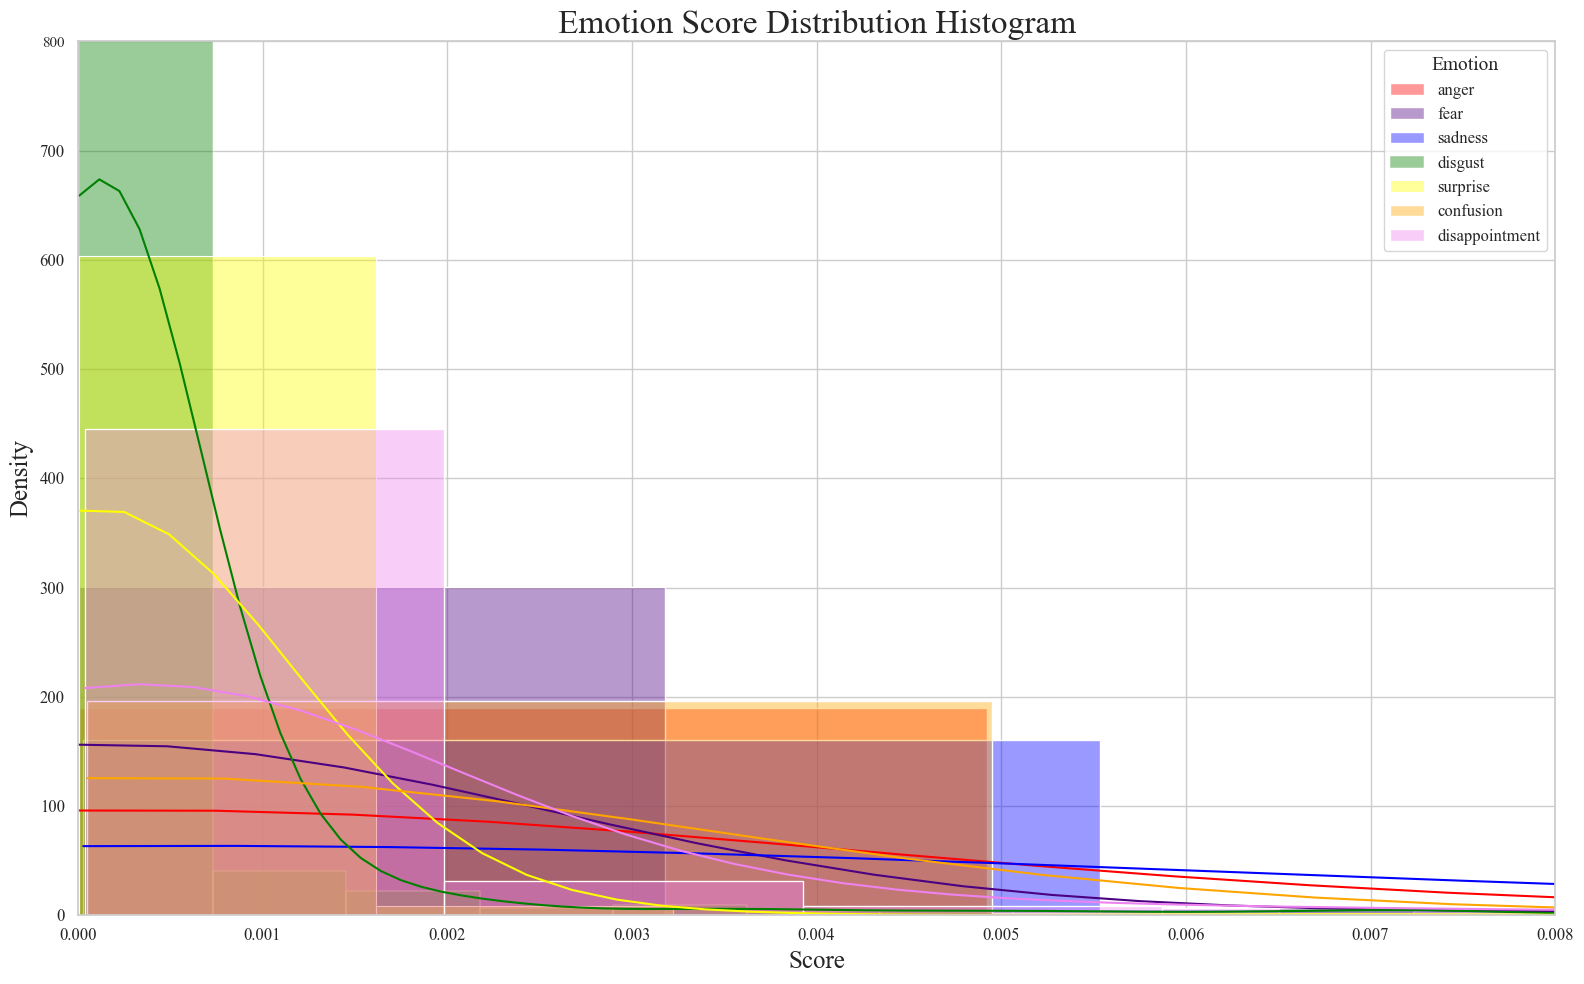

In [25]:
#Emotions Score Distribution Histogram w KDE Plot

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set seaborn style and font
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'

# Define the corresponding colors
emotion_colors = {
    'anger': 'red',         
    'fear': 'indigo',        
    'sadness': 'blue',     
    'disgust': 'green', 
    'surprise': 'yellow',         
    'confusion': 'orange',   
    'disappointment': 'violet'
}

# Combine all emotion scores into a DataFrame
data = {
    'Score': anger_scores + fear_scores + sadness_scores + disgust_scores +
             surprise_scores + confusion_scores + disappointment_scores,
    'Emotion': (['anger'] * len(anger_scores) +
                ['fear'] * len(fear_scores) +
                ['sadness'] * len(sadness_scores) +
                ['disgust'] * len(disgust_scores) +
                ['surprise'] * len(surprise_scores) +
                ['confusion'] * len(confusion_scores) +
                ['disappointment'] * len(disappointment_scores))
}

df_all = pd.DataFrame(data)

# Define vertical bin positions inside x-axis limits (e.g. 3 lines between 0 and 0.08)
bin_positions = np.linspace(0, 0.08, num=5)[1:-1]  # [0.02, 0.04, 0.06]

plt.figure(figsize=(16, 10))

# Plot histograms for each emotion with transparency to see overlaps
for emotion, color in emotion_colors.items():
    sns.histplot(
        data=df_all[df_all['Emotion'] == emotion],
        x='Score',
        bins=30,
        color=color,
        label=emotion,
        alpha=0.4,
        kde=True,
        stat='density'
    )

# Add vertical dashed lines for bins
for pos in bin_positions:
    plt.axvline(x=pos, color='grey', linestyle='--', linewidth=1, alpha=0.7)

# Customize plot appearance
plt.title('Emotion Score Distribution Histogram', fontsize=24)
plt.xlabel('Score', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 0.008)
plt.ylim(0, 800)

# Let y-limit be automatic or set if you prefer (optional)
# plt.ylim(0, 50)

# Add legend
plt.legend(title='Emotion', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
#Emotion Intensity and Variability Analysis

import matplotlib.pyplot as plt

# Select only emotion columns (update as per your data)
emotion_columns = ['anger','fear','sadness','disgust','surprise','confusion','disappointment']  
df_emotions = emotion_df[emotion_columns]

# Set datetime as index to enable time-based rolling window
df_emotions.index = emotion_df['datetime']

# Mean intensity of each emotion
mean_intensity = df_emotions.mean()

# Variability (standard deviation) of each emotion
emotion_variability = df_emotions.std()

print("Mean intensity:\n", mean_intensity)
print("\nVariability (std dev):\n", emotion_variability)

Mean intensity:
 anger             0.002665
fear              0.001434
sadness           0.005125
disgust           0.000436
surprise          0.000518
confusion         0.001802
disappointment    0.001599
dtype: float64

Variability (std dev):
 anger             0.012831
fear              0.008196
sadness           0.018840
disgust           0.001814
surprise          0.003485
confusion         0.010207
disappointment    0.005561
dtype: float64


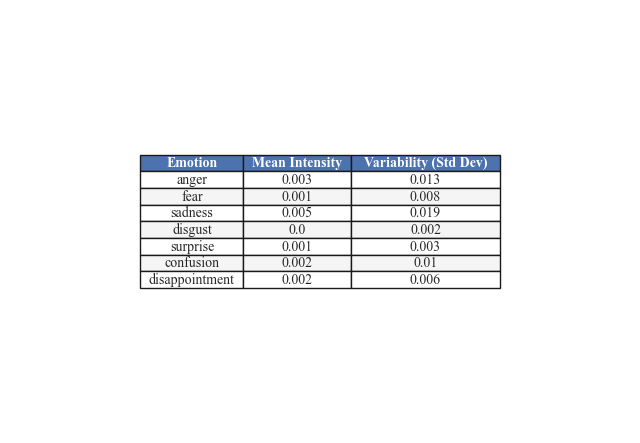

In [35]:
# Styled Table for Mean Intensity & Variability

# Combine mean and variability into one DataFrame
summary_df = pd.DataFrame({
    "Mean Intensity": mean_intensity.round(3),
    "Variability (Std Dev)": emotion_variability.round(3)
}).reset_index().rename(columns={"index": "Emotion"})

# Plot table using matplotlib
fig, ax = plt.subplots(figsize=(8, len(summary_df)*0.5 + 2))  # dynamic height
ax.axis("off")

# Create the table
table = ax.table(
    cellText=summary_df.values,
    colLabels=summary_df.columns,
    cellLoc="center",
    loc="center"
)

# Style adjustments
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(summary_df.columns))))

# Header styling
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight="bold", color="white")
        cell.set_facecolor("#4C72B0")  # dark blue header
    else:
        cell.set_facecolor("#F5F5F5" if row % 2 == 0 else "white")  # alternating rows

# Save as high-resolution PNG
plt.savefig("emotion_intensity_variability_table.png", dpi=300, bbox_inches="tight")
plt.show()


Level 2: Change point analyses

Detected change points (anger): [10, 45, 50, 65, 70, 110, 120, 190, 195, 250, 265, 280, 290, 370, 380, 400, 444]
Change point dates (anger): [Timestamp('2022-03-01 14:40:00'), Timestamp('2022-05-05 14:00:00'), Timestamp('2022-05-09 16:47:00'), Timestamp('2022-05-31 18:00:00'), Timestamp('2022-06-14 14:30:00'), Timestamp('2022-09-22 03:54:00'), Timestamp('2022-10-07 10:00:00'), Timestamp('2023-02-24 18:30:00'), Timestamp('2023-03-03 17:40:00'), Timestamp('2023-07-28 16:30:00'), Timestamp('2023-09-28 16:45:00'), Timestamp('2023-10-27 18:00:00'), Timestamp('2023-12-13 20:10:00'), Timestamp('2024-06-15 20:11:00'), Timestamp('2024-06-25 11:28:00'), Timestamp('2024-09-12 13:50:00')]


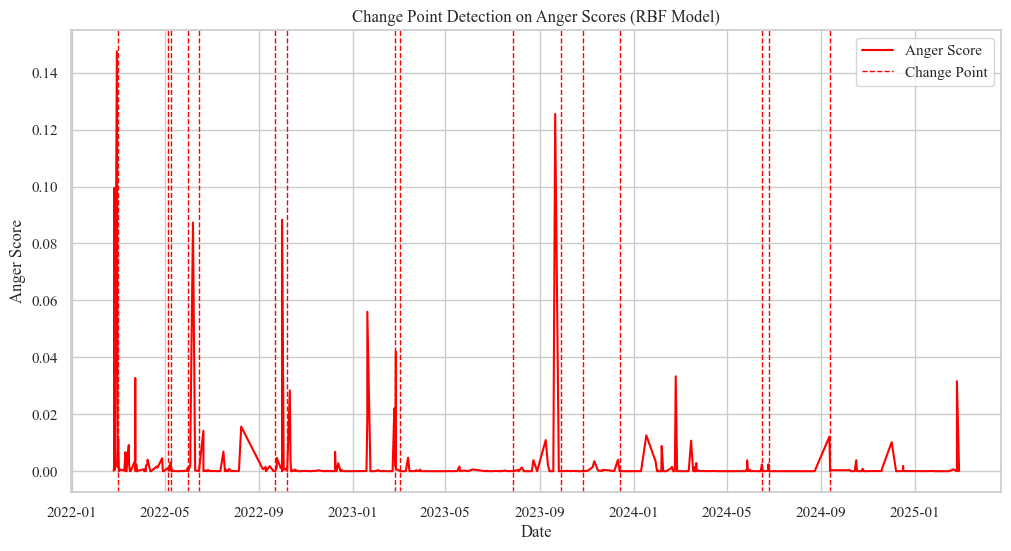

In [38]:
#Statistical Change Point Detection - Anger

import ruptures as rpt
import matplotlib.pyplot as plt
import pandas as pd

# Sort by datetime just in case
emotion_df = emotion_df.sort_values('datetime').reset_index(drop=True)

# Prepare the emotion score series 
anger_series = emotion_df['anger'].values

# Change point detection using RBF
model = "rbf"
algo = rpt.Pelt(model=model).fit(anger_series)

# Lower penalty, e.g., 0.5
penalty = 1
change_points = algo.predict(pen=penalty)

print("Detected change points (anger):", change_points)
print_change_point_dates=(change_points, emotion_df)

# Print the actual dates of the change points
change_point_dates = emotion_df.loc[change_points[:-1], 'datetime'].tolist()
print("Change point dates (anger):", change_point_dates)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(emotion_df['datetime'], anger_series, label='Anger Score', color='red')
for i, cp in enumerate(change_points[:-1]):
    plt.axvline(emotion_df.loc[cp, 'datetime'], 
                color='red',       
                linestyle='--', 
                linewidth=1,           # skinny line
                label='Change Point' if i == 0 else "")

plt.title('Change Point Detection on Anger Scores (RBF Model)')
plt.xlabel('Date')
plt.ylabel('Anger Score')
plt.legend()
plt.grid(True)
plt.show()

Detected change points (fear): [10, 45, 50, 55, 65, 70, 265, 290, 325, 345, 355, 444]
Change point dates (fear): [Timestamp('2022-03-01 14:40:00'), Timestamp('2022-05-05 14:00:00'), Timestamp('2022-05-09 16:47:00'), Timestamp('2022-05-24 13:30:00'), Timestamp('2022-05-31 18:00:00'), Timestamp('2022-06-14 14:30:00'), Timestamp('2023-09-28 16:45:00'), Timestamp('2023-12-13 20:10:00'), Timestamp('2024-03-12 15:35:00'), Timestamp('2024-04-18 01:15:00'), Timestamp('2024-05-23 09:42:00')]


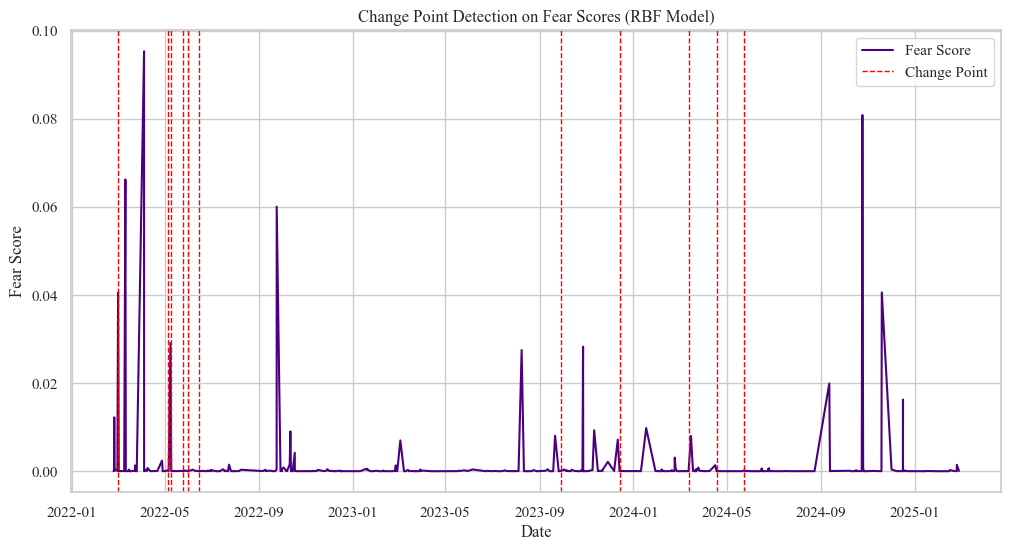

In [41]:
#Statistical Change Point Detection - Fear

# Sort by datetime just in case
emotion_df = emotion_df.sort_values('datetime').reset_index(drop=True)

# Prepare the emotion score series 
fear_series = emotion_df['fear'].values

# Change point detection using RBF
model = "rbf"
algo = rpt.Pelt(model=model).fit(fear_series)

# Lower penalty, e.g., 0.5
penalty = 1
change_points = algo.predict(pen=penalty)

print("Detected change points (fear):", change_points)
print_change_point_dates=(change_points, emotion_df)

# Print the actual dates of the change points
change_point_dates = emotion_df.loc[change_points[:-1], 'datetime'].tolist()
print("Change point dates (fear):", change_point_dates)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(emotion_df['datetime'], fear_series, label='Fear Score', color='indigo')
for i, cp in enumerate(change_points[:-1]):
    plt.axvline(emotion_df.loc[cp, 'datetime'], 
                color='red',       
                linestyle='--', 
                linewidth=1,           # skinny line
                label='Change Point' if i == 0 else "")

plt.title('Change Point Detection on Fear Scores (RBF Model)')
plt.xlabel('Date')
plt.ylabel('Fear Score')
plt.legend()
plt.grid(True)
plt.show()

Detected change points (sadness): [5, 10, 45, 50, 65, 70, 105, 125, 190, 195, 275, 290, 444]
Change point dates (fear): [Timestamp('2022-02-24 18:10:00'), Timestamp('2022-03-01 14:40:00'), Timestamp('2022-05-05 14:00:00'), Timestamp('2022-05-09 16:47:00'), Timestamp('2022-05-31 18:00:00'), Timestamp('2022-06-14 14:30:00'), Timestamp('2022-09-09 14:55:00'), Timestamp('2022-10-13 09:45:00'), Timestamp('2023-02-24 18:30:00'), Timestamp('2023-03-03 17:40:00'), Timestamp('2023-10-25 08:45:00'), Timestamp('2023-12-13 20:10:00')]


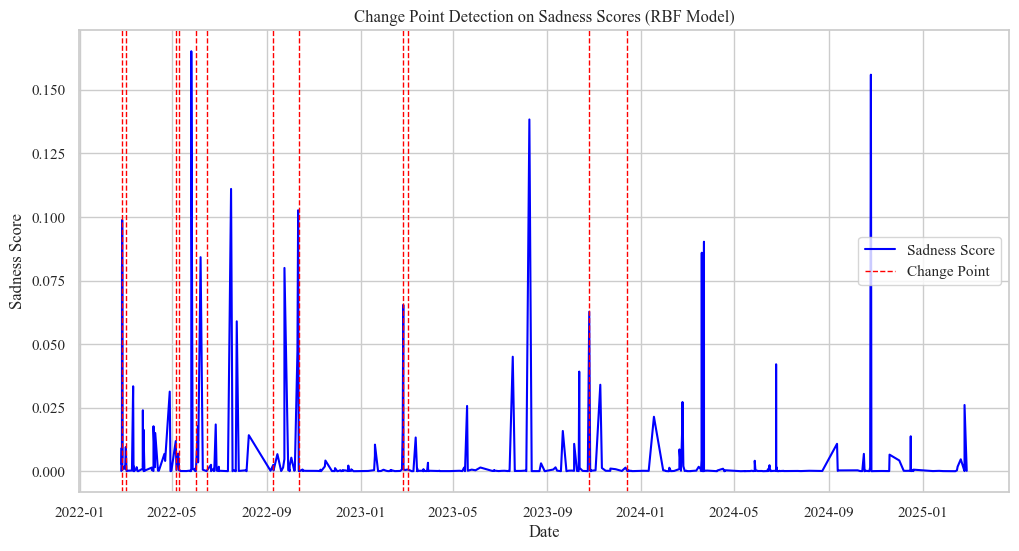

In [42]:
#Statistical Change Point Detection - Sadness

# Sort by datetime just in case
emotion_df = emotion_df.sort_values('datetime').reset_index(drop=True)

# Prepare the emotion score series 
sadness_series = emotion_df['sadness'].values

# Change point detection using RBF
model = "rbf"
algo = rpt.Pelt(model=model).fit(sadness_series)

# Lower penalty, e.g., 0.5
penalty = 1
change_points = algo.predict(pen=penalty)

print("Detected change points (sadness):", change_points)
print_change_point_dates=(change_points, emotion_df)

# Print the actual dates of the change points
change_point_dates = emotion_df.loc[change_points[:-1], 'datetime'].tolist()
print("Change point dates (fear):", change_point_dates)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(emotion_df['datetime'], sadness_series, label='Sadness Score', color='blue')
for i, cp in enumerate(change_points[:-1]):
    plt.axvline(emotion_df.loc[cp, 'datetime'], 
                color='red',       
                linestyle='--', 
                linewidth=1,           # skinny line
                label='Change Point' if i == 0 else "")

plt.title('Change Point Detection on Sadness Scores (RBF Model)')
plt.xlabel('Date')
plt.ylabel('Sadness Score')
plt.legend()
plt.grid(True)
plt.show()

Detected change points (disgust): [10, 50, 65, 70, 85, 110, 120, 190, 195, 250, 265, 270, 280, 285, 290, 365, 380, 444]
Change point dates (disgust): [Timestamp('2022-03-01 14:40:00'), Timestamp('2022-05-09 16:47:00'), Timestamp('2022-05-31 18:00:00'), Timestamp('2022-06-14 14:30:00'), Timestamp('2022-07-12 11:00:00'), Timestamp('2022-09-22 03:54:00'), Timestamp('2022-10-07 10:00:00'), Timestamp('2023-02-24 18:30:00'), Timestamp('2023-03-03 17:40:00'), Timestamp('2023-07-28 16:30:00'), Timestamp('2023-09-28 16:45:00'), Timestamp('2023-10-11 15:45:00'), Timestamp('2023-10-27 18:00:00'), Timestamp('2023-11-21 18:30:00'), Timestamp('2023-12-13 20:10:00'), Timestamp('2024-06-13 12:45:00'), Timestamp('2024-06-25 11:28:00')]


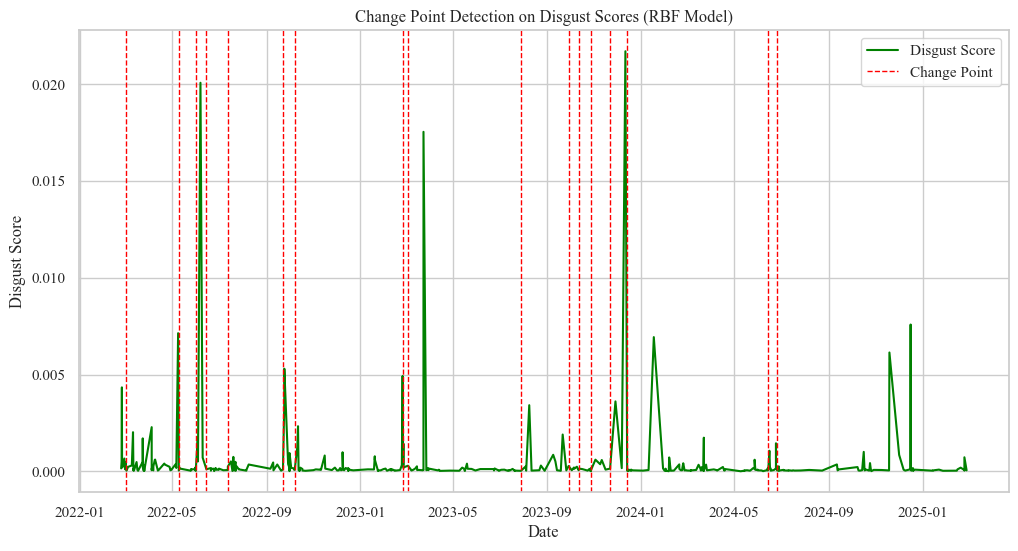

In [43]:
#Statistical Change Point Detection - Disgust

# Sort by datetime just in case
emotion_df = emotion_df.sort_values('datetime').reset_index(drop=True)

# Prepare the emotion score series 
disgust_series = emotion_df['disgust'].values

# Change point detection using RBF
model = "rbf"
algo = rpt.Pelt(model=model).fit(disgust_series)

# Lower penalty, e.g., 0.5
penalty = 1
change_points = algo.predict(pen=penalty)

print("Detected change points (disgust):", change_points)
print_change_point_dates=(change_points, emotion_df)

# Print the actual dates of the change points
change_point_dates = emotion_df.loc[change_points[:-1], 'datetime'].tolist()
print("Change point dates (disgust):", change_point_dates)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(emotion_df['datetime'], disgust_series, label='Disgust Score', color='green')
for i, cp in enumerate(change_points[:-1]):
    plt.axvline(emotion_df.loc[cp, 'datetime'], 
                color='red',       
                linestyle='--', 
                linewidth=1,           # skinny line
                label='Change Point' if i == 0 else "")

plt.title('Change Point Detection on Disgust Scores (RBF Model)')
plt.xlabel('Date')
plt.ylabel('Disgust Score')
plt.legend()
plt.grid(True)
plt.show()

Detected change points (surprise): [100, 105, 120, 125, 200, 205, 210, 230, 265, 290, 325, 340, 385, 405, 420, 440, 444]
Change point dates (surprise): [Timestamp('2022-08-05 14:30:03'), Timestamp('2022-09-09 14:55:00'), Timestamp('2022-10-07 10:00:00'), Timestamp('2022-10-13 09:45:00'), Timestamp('2023-03-15 09:45:00'), Timestamp('2023-03-22 11:00:00'), Timestamp('2023-03-23 22:30:00'), Timestamp('2023-05-30 10:30:00'), Timestamp('2023-09-28 16:45:00'), Timestamp('2023-12-13 20:10:00'), Timestamp('2024-03-12 15:35:00'), Timestamp('2024-03-26 14:45:00'), Timestamp('2024-06-28 08:30:00'), Timestamp('2024-10-14 12:00:00'), Timestamp('2024-12-07 10:00:00'), Timestamp('2025-02-24 08:40:00')]


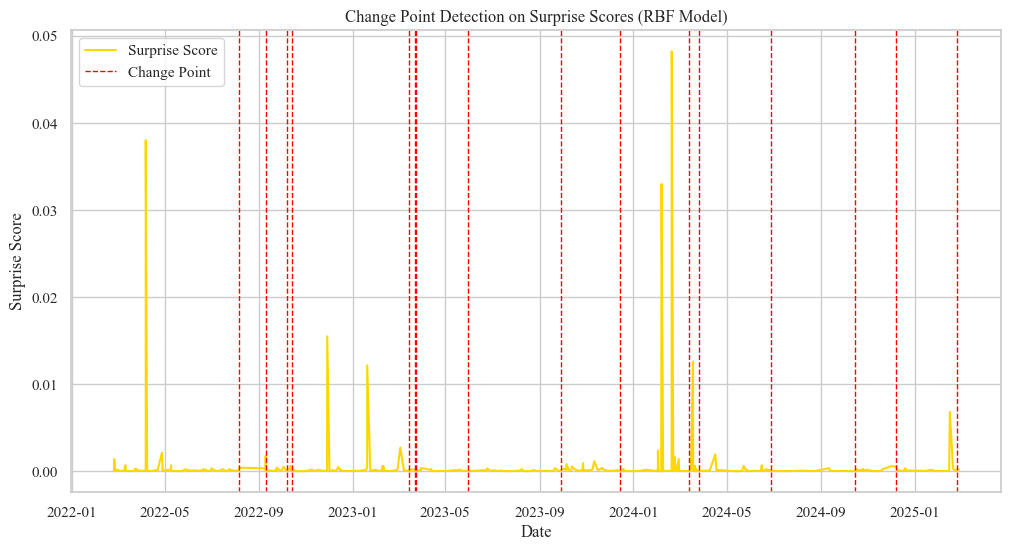

In [45]:
#Statistical Change Point Detection - Surprise

# Sort by datetime just in case
emotion_df = emotion_df.sort_values('datetime').reset_index(drop=True)

# Prepare the emotion score series 
surprise_series = emotion_df['surprise'].values

# Change point detection using RBF
model = "rbf"
algo = rpt.Pelt(model=model).fit(surprise_series)

# Lower penalty, e.g., 0.5
penalty = 1
change_points = algo.predict(pen=penalty)

print("Detected change points (surprise):", change_points)
print_change_point_dates=(change_points, emotion_df)

# Print the actual dates of the change points
change_point_dates = emotion_df.loc[change_points[:-1], 'datetime'].tolist()
print("Change point dates (surprise):", change_point_dates)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(emotion_df['datetime'], surprise_series, label='Surprise Score', color='gold')
for i, cp in enumerate(change_points[:-1]):
    plt.axvline(emotion_df.loc[cp, 'datetime'], 
                color='red',       
                linestyle='--', 
                linewidth=1,           # skinny line
                label='Change Point' if i == 0 else "")

plt.title('Change Point Detection on Surprise Scores (RBF Model)')
plt.xlabel('Date')
plt.ylabel('Surprise Score')
plt.legend()
plt.grid(True)
plt.show()

Detected change points (confusion): [10, 105, 110, 115, 170, 175, 225, 245, 260, 295, 315, 320, 325, 385, 400, 420, 430, 444]
Change point dates (confusion): [Timestamp('2022-03-01 14:40:00'), Timestamp('2022-09-09 14:55:00'), Timestamp('2022-09-22 03:54:00'), Timestamp('2022-09-30 16:20:00'), Timestamp('2023-01-23 17:05:00'), Timestamp('2023-01-27 12:30:00'), Timestamp('2023-05-15 14:00:00'), Timestamp('2023-07-13 17:40:00'), Timestamp('2023-09-11 12:00:00'), Timestamp('2023-12-18 20:30:00'), Timestamp('2024-02-23 10:23:00'), Timestamp('2024-02-29 11:00:00'), Timestamp('2024-03-12 15:35:00'), Timestamp('2024-06-28 08:30:00'), Timestamp('2024-09-12 13:50:00'), Timestamp('2024-12-07 10:00:00'), Timestamp('2024-12-19 23:15:00')]


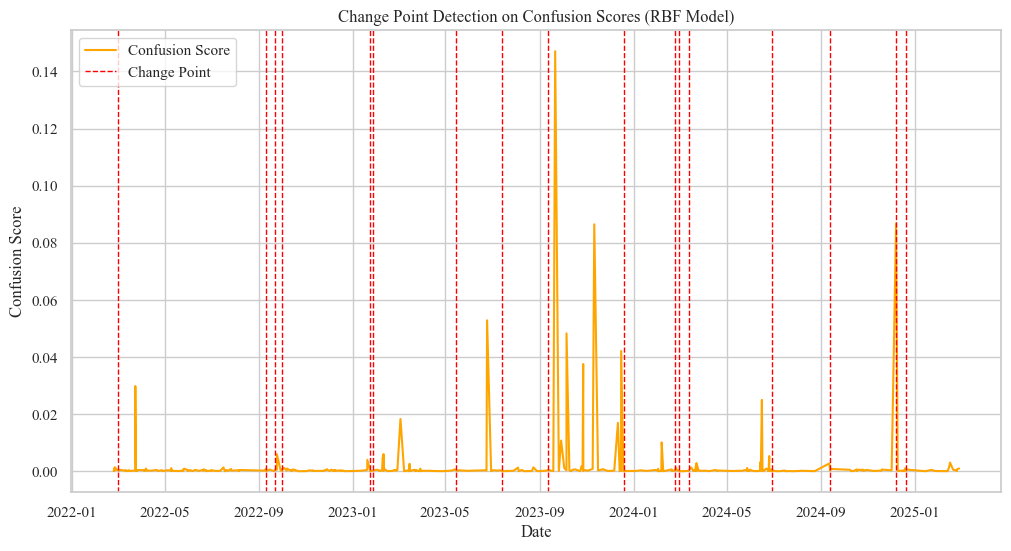

In [46]:
#Statistical Change Point Detection - Confusion

# Sort by datetime just in case
emotion_df = emotion_df.sort_values('datetime').reset_index(drop=True)

# Prepare the emotion score series 
confusion_series = emotion_df['confusion'].values

# Change point detection using RBF
model = "rbf"
algo = rpt.Pelt(model=model).fit(confusion_series)

# Lower penalty, e.g., 0.5
penalty = 1
change_points = algo.predict(pen=penalty)

print("Detected change points (confusion):", change_points)
print_change_point_dates=(change_points, emotion_df)

# Print the actual dates of the change points
change_point_dates = emotion_df.loc[change_points[:-1], 'datetime'].tolist()
print("Change point dates (confusion):", change_point_dates)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(emotion_df['datetime'], confusion_series, label='Confusion Score', color='orange')
for i, cp in enumerate(change_points[:-1]):
    plt.axvline(emotion_df.loc[cp, 'datetime'], 
                color='red',       
                linestyle='--', 
                linewidth=1,           # skinny line
                label='Change Point' if i == 0 else "")

plt.title('Change Point Detection on Confusion Scores (RBF Model)')
plt.xlabel('Date')
plt.ylabel('Confusion Score')
plt.legend()
plt.grid(True)
plt.show()

Detected change points (disappointment): [10, 35, 50, 75, 105, 125, 190, 195, 210, 215, 280, 290, 315, 320, 380, 405, 444]
Change point dates (disappointment): [Timestamp('2022-03-01 14:40:00'), Timestamp('2022-04-06 14:20:00'), Timestamp('2022-05-09 16:47:00'), Timestamp('2022-06-23 23:00:00'), Timestamp('2022-09-09 14:55:00'), Timestamp('2022-10-13 09:45:00'), Timestamp('2023-02-24 18:30:00'), Timestamp('2023-03-03 17:40:00'), Timestamp('2023-03-23 22:30:00'), Timestamp('2023-03-30 11:40:00'), Timestamp('2023-10-27 18:00:00'), Timestamp('2023-12-13 20:10:00'), Timestamp('2024-02-23 10:23:00'), Timestamp('2024-02-29 11:00:00'), Timestamp('2024-06-25 11:28:00'), Timestamp('2024-10-14 12:00:00')]


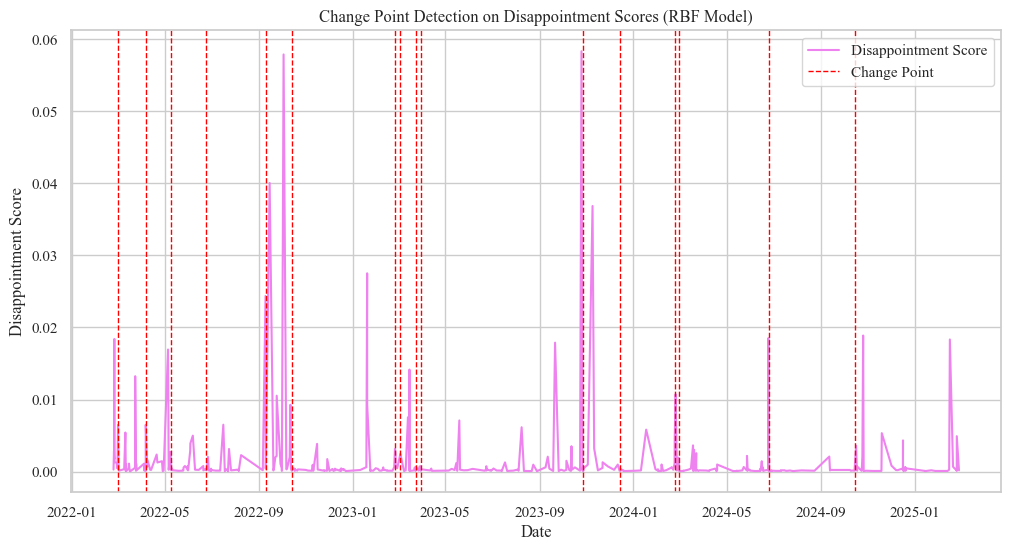

In [47]:
#Statistical Change Point Detection - Disappointment

# Sort by datetime just in case
emotion_df = emotion_df.sort_values('datetime').reset_index(drop=True)

# Prepare the emotion score series 
disappointment_series = emotion_df['disappointment'].values

# Change point detection using RBF
model = "rbf"
algo = rpt.Pelt(model=model).fit(disappointment_series)

# Lower penalty, e.g., 0.5
penalty = 1
change_points = algo.predict(pen=penalty)

print("Detected change points (disappointment):", change_points)
print_change_point_dates=(change_points, emotion_df)

# Print the actual dates of the change points
change_point_dates = emotion_df.loc[change_points[:-1], 'datetime'].tolist()
print("Change point dates (disappointment):", change_point_dates)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(emotion_df['datetime'], disappointment_series, label='Disappointment Score', color='violet')
for i, cp in enumerate(change_points[:-1]):
    plt.axvline(emotion_df.loc[cp, 'datetime'], 
                color='red',       
                linestyle='--', 
                linewidth=1,           # skinny line
                label='Change Point' if i == 0 else "")

plt.title('Change Point Detection on Disappointment Scores (RBF Model)')
plt.xlabel('Date')
plt.ylabel('Disappointment Score')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
#Identify Common Change Points Between Emotions

from collections import defaultdict
from datetime import datetime

# Replace these lists with your actual data
change_point_dates = {
    "anger": [
        "2022-03-01 14:40:00", "2022-05-05 14:00:00", "2022-05-09 16:47:00", "2022-05-31 18:00:00",
        "2022-06-14 14:30:00", "2022-09-22 03:54:00", "2022-10-07 10:00:00", "2023-02-24 18:30:00",
        "2023-03-03 17:40:00", "2023-07-28 16:30:00", "2023-09-28 16:45:00", "2023-10-27 18:00:00",
        "2023-12-13 20:10:00", "2024-06-15 20:11:00", "2024-06-25 11:28:00", "2024-09-12 13:50:00"
    ],
    "fear": [
        "2022-03-01 14:40:00", "2022-05-05 14:00:00", "2022-05-09 16:47:00", "2022-05-24 13:30:00",
        "2022-05-31 18:00:00", "2022-06-14 14:30:00", "2023-09-28 16:45:00", "2023-12-13 20:10:00",
        "2024-03-12 15:35:00", "2024-04-18 01:15:00", "2024-05-23 09:42:00"
    ],
    "sadness": [
        "2022-02-24 18:10:00", "2022-03-01 14:40:00", "2022-05-05 14:00:00", "2022-05-09 16:47:00",
        "2022-05-31 18:00:00", "2022-06-14 14:30:00", "2022-09-09 14:55:00", "2022-10-13 09:45:00",
        "2023-02-24 18:30:00", "2023-03-03 17:40:00", "2023-10-25 08:45:00", "2023-12-13 20:10:00"
    ],
    "disgust": [
        "2022-03-01 14:40:00", "2022-05-09 16:47:00", "2022-05-31 18:00:00", "2022-06-14 14:30:00",
        "2022-07-12 11:00:00", "2022-09-22 03:54:00", "2022-10-07 10:00:00", "2023-02-24 18:30:00",
        "2023-03-03 17:40:00", "2023-07-28 16:30:00", "2023-09-28 16:45:00", "2023-10-11 15:45:00",
        "2023-10-27 18:00:00", "2023-11-21 18:30:00", "2023-12-13 20:10:00", "2024-06-13 12:45:00",
        "2024-06-25 11:28:00"
    ],
    "surprise": [
        "2022-08-05 14:30:03", "2022-09-09 14:55:00", "2022-10-07 10:00:00", "2022-10-13 09:45:00",
        "2023-03-15 09:45:00", "2023-03-22 11:00:00", "2023-03-23 22:30:00", "2023-05-30 10:30:00",
        "2023-09-28 16:45:00", "2023-12-13 20:10:00", "2024-03-12 15:35:00", "2024-03-26 14:45:00",
        "2024-06-28 08:30:00", "2024-10-14 12:00:00", "2024-12-07 10:00:00", "2025-02-24 08:40:00"
    ],
    "confusion": [
        "2022-03-01 14:40:00", "2022-09-09 14:55:00", "2022-09-22 03:54:00", "2022-09-30 16:20:00",
        "2023-01-23 17:05:00", "2023-01-27 12:30:00", "2023-05-15 14:00:00", "2023-07-13 17:40:00",
        "2023-09-11 12:00:00", "2023-12-18 20:30:00", "2024-02-23 10:23:00", "2024-02-29 11:00:00",
        "2024-03-12 15:35:00", "2024-06-28 08:30:00", "2024-09-12 13:50:00", "2024-12-07 10:00:00",
        "2024-12-19 23:15:00"
    ],
    "disappointment": [
        "2022-03-01 14:40:00", "2022-04-06 14:20:00", "2022-05-09 16:47:00", "2022-06-23 23:00:00",
        "2022-09-09 14:55:00", "2022-10-13 09:45:00", "2023-02-24 18:30:00", "2023-03-03 17:40:00",
        "2023-03-23 22:30:00", "2023-03-30 11:40:00", "2023-10-27 18:00:00", "2023-12-13 20:10:00",
        "2024-02-23 10:23:00", "2024-02-29 11:00:00", "2024-06-25 11:28:00", "2024-10-14 12:00:00"
    ]
}

# Create a dictionary mapping each timestamp to a list of emotions
date_to_emotions = defaultdict(list)

for emotion, dates in change_point_dates.items():
    for d in dates:
        dt = pd.to_datetime(d)
        date_to_emotions[dt].append(emotion)

# Filter for dates with more than one emotion
common_dates = {date: emotions for date, emotions in date_to_emotions.items() if len(emotions) > 1}

# Display the results
print("Common change point dates across emotions:")
for date, emotions in sorted(common_dates.items()):
    print(f"{date} -> {', '.join(emotions)}")


Common change point dates across emotions:
2022-03-01 14:40:00 -> anger, fear, sadness, disgust, confusion, disappointment
2022-05-05 14:00:00 -> anger, fear, sadness
2022-05-09 16:47:00 -> anger, fear, sadness, disgust, disappointment
2022-05-31 18:00:00 -> anger, fear, sadness, disgust
2022-06-14 14:30:00 -> anger, fear, sadness, disgust
2022-09-09 14:55:00 -> sadness, surprise, confusion, disappointment
2022-09-22 03:54:00 -> anger, disgust, confusion
2022-10-07 10:00:00 -> anger, disgust, surprise
2022-10-13 09:45:00 -> sadness, surprise, disappointment
2023-02-24 18:30:00 -> anger, sadness, disgust, disappointment
2023-03-03 17:40:00 -> anger, sadness, disgust, disappointment
2023-03-23 22:30:00 -> surprise, disappointment
2023-07-28 16:30:00 -> anger, disgust
2023-09-28 16:45:00 -> anger, fear, disgust, surprise
2023-10-27 18:00:00 -> anger, disgust, disappointment
2023-12-13 20:10:00 -> anger, fear, sadness, disgust, surprise, disappointment
2024-02-23 10:23:00 -> confusion, dis

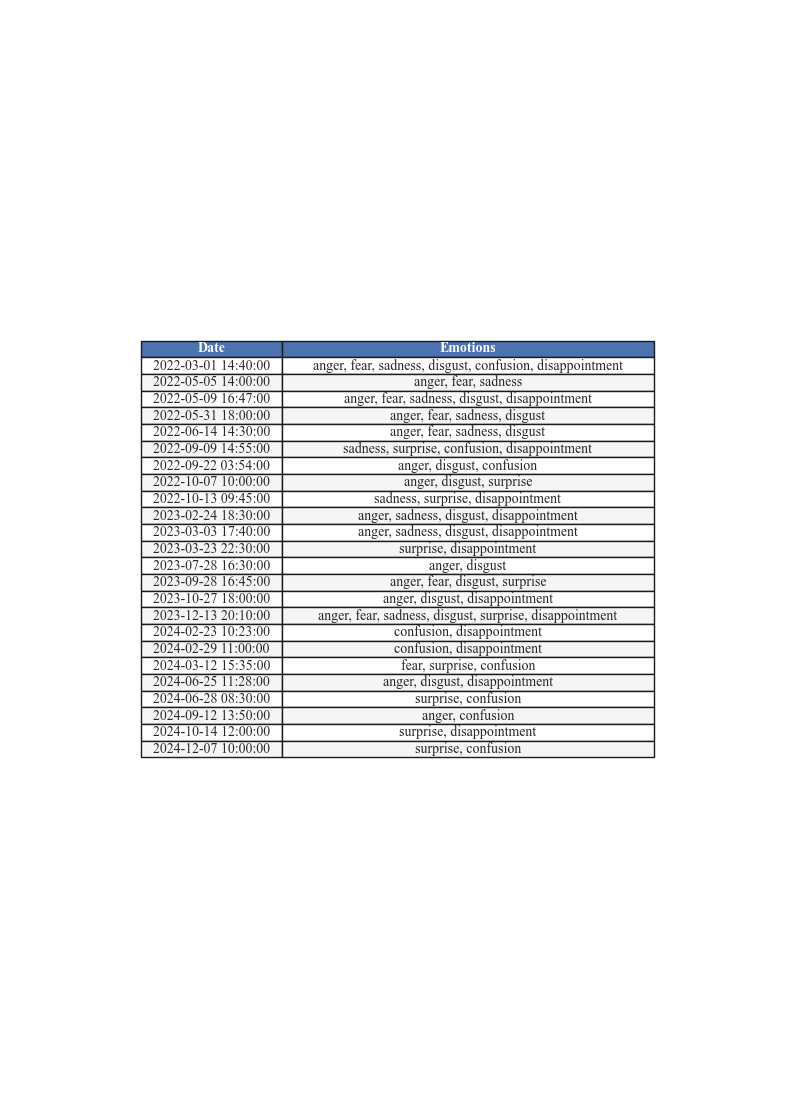

In [49]:
#Table Visualization of Common Change Points
import pandas as pd
import matplotlib.pyplot as plt

# Convert common dates dictionary into DataFrame
df = pd.DataFrame(
    [(date.strftime("%Y-%m-%d %H:%M:%S"), ", ".join(emotions)) for date, emotions in sorted(common_dates.items())],
    columns=["Date", "Emotions"]
)

# Plot table using matplotlib
fig, ax = plt.subplots(figsize=(10, len(df)*0.5 + 2))  # dynamic height
ax.axis("off")

# Create the table
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc="center",
    loc="center"
)

# Style adjustments
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))

# Header styling
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight="bold", color="white")
        cell.set_facecolor("#4C72B0")  # dark blue header
    else:
        cell.set_facecolor("#F5F5F5" if row % 2 == 0 else "white")  # alternating rows

# Save as high-resolution PNG
plt.savefig("common_change_points_table.png", dpi=300, bbox_inches="tight")
plt.show()


Level 3: Correlation analysis

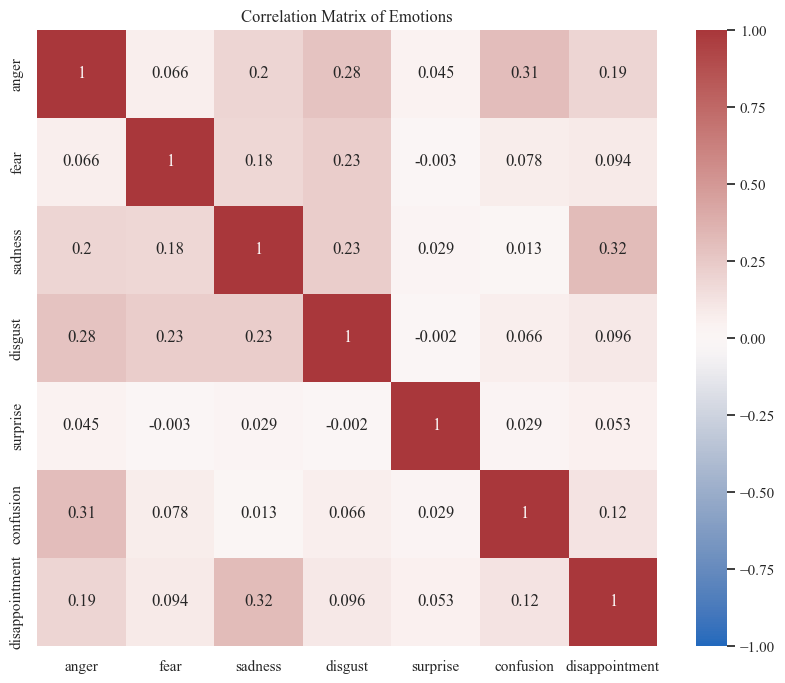

In [50]:
#Emotion Co-occurrence and Correlation Analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming emotion_df is your DataFrame with datetime and emotion columns like 'anger', 'joy', etc.

# Select only emotion columns for correlation analysis
emotion_columns = ['anger','fear','sadness','disgust','surprise','confusion','disappointment']  
df_emotions = emotion_df[emotion_columns]

# Calculate Pearson correlation matrix
correlation_matrix = df_emotions.corr(method='pearson')

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Emotions")
plt.show()
